In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
epochs = 5
num_classes = 10
batch_size = 100
lr = 0.001

In [58]:
mnist_train_dataset = torchvision.datasets.MNIST(root='../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

mnist_test_dataset = torchvision.datasets.MNIST(root='../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

In [59]:
mnist_train_loader = torch.utils.data.DataLoader(dataset=mnist_train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

mnist_test_loader = torch.utils.data.DataLoader(dataset=mnist_train_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)


In [60]:
cifar10_train_dataset = torchvision.datasets.CIFAR10(root='../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

cifar10_test_dataset = torchvision.datasets.CIFAR10(root='../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

Files already downloaded and verified


In [61]:
cifar10_train_loader = torch.utils.data.DataLoader(dataset=cifar10_train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

cifar10_test_loader = torch.utils.data.DataLoader(dataset=cifar10_test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

train dataset data :  torch.Size([60000, 28, 28])
train dataset target :  60000
test dataset data :  torch.Size([60000, 28, 28])
class :  {'0 - zero': 0, '1 - one': 1, '2 - two': 2, '3 - three': 3, '4 - four': 4, '5 - five': 5, '6 - six': 6, '7 - seven': 7, '8 - eight': 8, '9 - nine': 9}


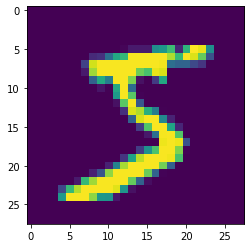

In [62]:
print('train dataset data : ',mnist_train_dataset.data.shape)
print('train dataset target : ',len(mnist_train_dataset.targets))
print('test dataset data : ',mnist_train_dataset.data.shape)

print('class : ',mnist_train_dataset.class_to_idx)
plt.imshow(mnist_train_dataset.data[0])

train dataset data :  (50000, 32, 32, 3)
train dataset target :  50000
test dataset data :  (50000, 32, 32, 3)
class :  {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


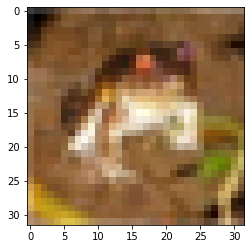

In [63]:
print('train dataset data : ',cifar10_train_dataset.data.shape)
print('train dataset target : ',len(cifar10_train_dataset.targets))
print('test dataset data : ',cifar10_train_dataset.data.shape)

print('class : ',cifar10_train_dataset.class_to_idx)
plt.imshow(cifar10_train_dataset.data[0])

In [108]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc = nn.Linear(8*8*32,num_classes)
    
    def forward(self, x):
        out = self.layer1(x)
        #print('1 : ',out.shape)
        out = self.layer2(out)
        #print('2 : ',out.shape)
        out = out.reshape(out.size(0), -1)
        #print('3 : ',out.shape)
        out = self.fc(out)
        #print('4 : ',out.shape)
        return out

In [109]:
model = ConvNet(num_classes).to(device)

In [110]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [111]:
model.parameters

<bound method Module.parameters of ConvNet(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=2048, out_features=10, bias=True)
)>

In [112]:
image, label = iter(cifar10_train_loader).next()

image.shape

torch.Size([100, 3, 32, 32])

In [113]:
output = model(image)

In [119]:
total_step = len(cifar10_train_loader)
for epoch in range(1):
    for i, (images, labels) in enumerate(cifar10_train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/500], Loss: 1.1255
Epoch [1/5], Step [200/500], Loss: 1.0582
Epoch [1/5], Step [300/500], Loss: 1.1472
Epoch [1/5], Step [400/500], Loss: 1.0481
Epoch [1/5], Step [500/500], Loss: 0.8941


In [122]:
# eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance) 
model.eval()
# 테스트 모드이다.

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=2048, out_features=10, bias=True)
)

In [123]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in cifar10_test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))
    

Test Accuracy of the model on the 10000 test images: 58.51 %


In [124]:
# Save the model checkpoint
torch.save(model.state_dict(), 'cnn_cifar10_model.ckpt')